In [1]:
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.applications import VGG16

In [2]:
# Load the VGG16 model pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
# freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Add a custom classifier
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [5]:
# create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
train_path = 'Train/'

In [8]:
import cv2 
import numpy as np
import os

In [9]:
def load_data(dir_path, image_width, image_height):
    X = []
    y = []
    label = dict()
    i = 0
    for file in os.listdir(dir_path):
        label[i] = file
        for image in os.listdir(dir_path + '/' + file):
            img = cv2.imread(dir_path + '/' + file + '/' + image)
            float_img = img.astype('float32')/255
            resize_img = cv2.resize(float_img, (image_width, image_height))
            X.append(resize_img)
            y.append(i)
        i += 1
    X = np.array(X)
    y = np.array(y)
    
    return X, y, label

In [10]:
# Load the data
X_train, y_train, label = load_data(train_path, 224, 224)


In [11]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]


In [12]:
# One hot encoding
y_train = to_categorical(y_train, 4)

In [13]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],


In [14]:
# Train model
hist = model.fit(X_train, y_train, batch_size=20, epochs=10, validation_split=0.3)

Epoch 1/10
7/7 [==============================] - 30s 4s/step - loss: 7.6982 - accuracy: 0.3357 - val_loss: 2.6167 - val_accuracy: 0.3833
Epoch 2/10
7/7 [==============================] - 30s 4s/step - loss: 1.5183 - accuracy: 0.6500 - val_loss: 1.3568 - val_accuracy: 0.6833
Epoch 3/10
7/7 [==============================] - 30s 4s/step - loss: 0.5679 - accuracy: 0.7929 - val_loss: 0.6932 - val_accuracy: 0.7333
Epoch 4/10
7/7 [==============================] - 30s 4s/step - loss: 0.2517 - accuracy: 0.8929 - val_loss: 0.1986 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 30s 5s/step - loss: 0.1650 - accuracy: 0.9357 - val_loss: 0.0772 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 29s 4s/step - loss: 0.0538 - accuracy: 0.9714 - val_loss: 0.1542 - val_accuracy: 0.9333
Epoch 7/10
7/7 [==============================] - 30s 4s/step - loss: 0.0254 - accuracy: 0.9929 - val_loss: 0.0340 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

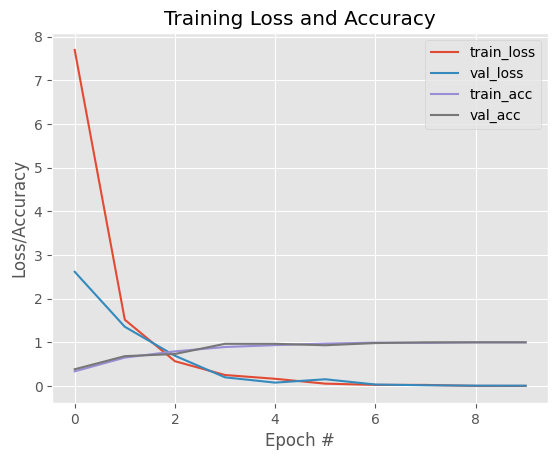

In [15]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure()
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [16]:
# Save model to file
# model.save('Model/model2.h5')